### Linear Model Fitting
This notebook will fit an OLS solution to a linear dataset using:
- The analytical solution
- Gradient descent (ordinary)
- Further gradient descent methods (stochastic, mini-batch)

In [188]:
#Data imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

Text(0.5, 1.0, 'Linear dataset with noise')

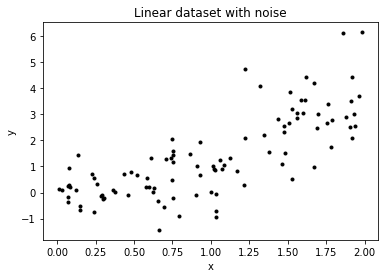

In [297]:
#Generating noisy linear dataset
X = 2*np.random.rand(100,1)
y = 0 + X**2 + np.random.randn(100,1)
plt.scatter(X,y, marker='.',
           color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear dataset with noise')

Fitting the line using analytical solution 
$$ \hat{\theta} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y} $$

In [298]:
#Adding constant term (a column vector of ones)
X_c = np.c_[np.ones((100,1)), X]
thetahat = np.linalg.inv(X_c.T.dot(X_c)).dot(X_c.T).dot(y)
print(thetahat)

[[-0.6220792]
 [ 2.0231919]]


Text(0.5, 1.0, 'Fitted OLS using analytical solution')

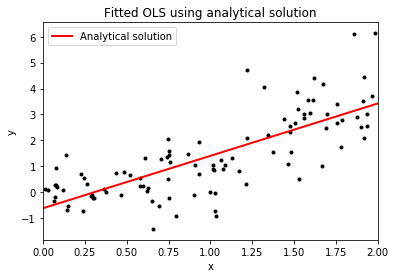

In [299]:
#Testing the line on new data
X_test = np.array([[0],[2]])
X_test_c = np.c_[np.ones((2,1)), X_test] #adding the intercept term again
y_pred = X_test_c.dot(thetahat)
plt.plot(X_test, y_pred, linewidth=2, 
         color='red', label='Analytical solution')
plt.scatter(X,y, marker='.',
           color='black')
plt.xlim([0,2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted OLS using analytical solution')

Alternate methodology to get $\hat{\theta}$ vector using scikit-learn library for performing OLS

Intercept: [-0.6220792], coefficients: [[2.0231919]]


Text(0.5, 1.0, 'Fitted OLS using scikit-learn library')

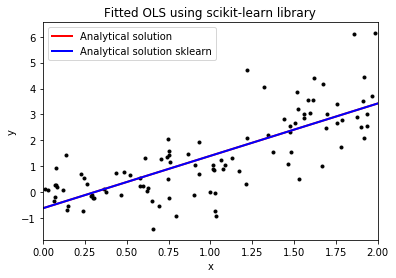

In [300]:
linear_regression = LinearRegression()
linear_regression.fit(X, y) #fitting the model to training data
print('Intercept: {}, coefficients: {}'.format(linear_regression.intercept_, 
                                               linear_regression.coef_))
y_pred_sk = linear_regression.predict(X_test)
plt.plot(X_test, y_pred, linewidth=2,
        color='red', label= 'Analytical solution')
plt.plot(X_test, y_pred_sk, linewidth=2, 
         color='blue', label='Analytical solution sklearn')
plt.scatter(X,y, marker='.',
           color='black')
plt.xlim([0,2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted OLS using scikit-learn library')

Making the algorithm more computationally efficient using Gradient Descent.\
We must compute the gradient vector of the cost function, defined as follows:
$$\nabla_{\theta}\textrm{MSE} = \begin{pmatrix}\frac{\partial}{\partial\theta_0}\textrm{MSE}(\theta)\\\frac{\partial}{\partial\theta_1}\textrm{MSE}(\theta)\\ \vdots \\ \frac{\partial}{\partial\theta_n}\textrm{MSE}(\theta) \end{pmatrix} = \frac{2}{m} \textbf{X}^T(\textbf{X}\mathbf{\theta} - \textbf{y})$$
where $ \frac{\partial}{\partial\theta_j}\textrm{MSE}(\theta) $ is defined as follows:
$$ \frac{\partial}{\partial\theta_j}\textrm{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\mathbf{\theta}^T\textbf{x}^{(i)} - y^{(i)})x_j^{(i)} $$


In [301]:
#Function to compute gradient descent
def gradient_descent_OLS(X, y,eta=0.1, iter_n=1000, tol=0.001):
    m = len(X)
    theta = np.random.randn(2,1)
    iteration_n = 1
    for i in range(iter_n):
        grads = 2/m*X.T.dot(X.dot(theta) - y)
        theta = theta - eta*grads
        if (np.absolute(grads) < tol).all():
            return theta, i
    return theta

thetahat_gd, iteration_n = gradient_descent_OLS(X_c, y, iter_n=1000, eta=0.1, tol=0.1)
print('The vector of optimised parameters is {} at iteration number: {}'.format(thetahat, iteration_n))

The vector of optimised parameters is [[-0.6220792]
 [ 2.0231919]] at iteration number: 9


Text(0.5, 1.0, 'Fitted OLS using gradient')

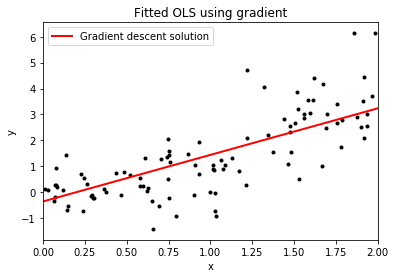

In [302]:
X_test_gd = np.array([[0],[2]])
X_test_gdc = np.c_[np.ones((2,1)), X_test] #adding the intercept term again
y_pred_gd = X_test_gdc.dot(thetahat_gd)
plt.plot(X_test_gd, y_pred_gd, linewidth=2, 
         color='red', label='Gradient descent solution')
plt.scatter(X,y, marker='.',
           color='black')
plt.xlim([0,2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted OLS using gradient')

### Stochastic Gradient Descent
Stochastic gradient descent works with the same principles of normal(batch) gradient descent, building on its weaknesses (mainly the fact that training on a large amount of data is very computationally costly and time consuming).\
However, a drawback to this algorithm is that, although it gets very close to a set of optimal parameters, it never truly reaches convergence. One way to deal with this, is to slowly reduce the learning rate (through a function called a $\textit{learning schedule}$.

In [303]:
#function implementic stochastic gradient descent
def stochastic_gradient_descent(X, y, n_epochs=50, t0=5, t1=50):
    m = len(X)
    learning_schedule = lambda t, t0, t1: t0/(t+t1) #simple lambda function to switch between learning rates
    theta = np.random.randn(2,1) #initialising random parameters
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            grads = 2*xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch*m + 1, t0, t1)
            theta = theta - eta*grads
    return theta

theta = stochastic_gradient_descent(X_c, y, n_epochs=1)
theta

array([[-0.51440192],
       [ 2.84806385]])

Text(0.5, 1.0, 'Optimising with stochastic gradient descent')

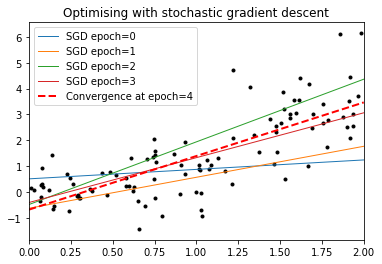

In [395]:
last_epoch = 5
for i in range(0,last_epoch):
    thetahat = stochastic_gradient_descent(X_c, y, n_epochs=i)
    X_test = np.array([[0],[2]])
    X_test_c = np.c_[np.ones((2,1)), X_test] #adding the intercept term again
    y_pred = X_test_c.dot(thetahat)
    if i < last_epoch-1:
        plt.plot(X_test, y_pred, linewidth=1, label='SGD epoch={}'.format(i))
    else:
        plt.plot(X_test, y_pred, linewidth=2, label='Convergence at epoch={}'.format(i),
                color='red', linestyle='--')
        
plt.legend()
plt.scatter(X,y, marker='.',
           color='black')
plt.xlim([0,2])
plt.title('Optimising with stochastic gradient descent')